# what is cca ? 

Complete case analysis, also known as listwise deletion, is a method of handling missing data in machine learning. It involves removing any data points that have missing values for any of the variables used in the analysis. This approach is often used when the amount of missing data is small and the missing data is believed to be missing at random.

The advantage of complete case analysis is that it is a simple and straightforward method that does not require any imputation or interpolation of missing data. However, it can lead to biased results if the missing data is not missing at random or if the amount of missing data is large. In addition, it can reduce the sample size and potentially limit the power of the analysis.

Complete case analysis is commonly used in statistical analyses such as regression and ANOVA. However, there are other methods of handling missing data, such as imputation techniques that can be used when complete case analysis is not appropriate or effective.

# how much missing values can we drop in data ? 

The amount of missing data that can be dropped depends on several factors, including the amount and pattern of missing data, the size of the dataset, and the specific research question or analysis being conducted.

In general, dropping a small percentage of missing data, such as less than 5%, is often considered acceptable, especially if the remaining data is still large enough to provide adequate statistical power. However, if the amount of missing data is higher than 5%, the use of complete case analysis may result in biased estimates and reduced statistical power.

Moreover, dropping too much data can lead to overfitting and reduce the generalizability of the model. In some cases, the missing data may be informative and dropping them could lead to a loss of important information.

Therefore, it is important to carefully evaluate the amount and pattern of missing data before deciding how to handle it. In some cases, it may be more appropriate to use imputation techniques or other methods to handle missing data rather than simply dropping it.

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("C:\\Users\\subha\\dsjob.csv")
df.head() 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [3]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [4]:
cols = [var for var  in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean() >0] 
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [5]:
df[cols].head()

,enrolled_university,education_level,experience,last_new_job
0,Full time course,Graduate,9,1
1,no_enrollment,Graduate,5,1
2,no_enrollment,High School,<1,never
3,no_enrollment,Masters,11,1
4,no_enrollment,Graduate,>20,>4


In [6]:
df[cols].tail()

,enrolled_university,education_level,experience,last_new_job
2124,no_enrollment,Graduate,16,4
2125,no_enrollment,Masters,18,2
2126,no_enrollment,Primary School,3,never
2127,Full time course,High School,7,1
2128,no_enrollment,Masters,15,2


In [7]:
df[cols].sample(5) 

,enrolled_university,education_level,experience,last_new_job
1796,no_enrollment,Graduate,>20,>4
1289,Full time course,Graduate,6,1
454,Full time course,Graduate,9,never
233,no_enrollment,Graduate,5,4
601,no_enrollment,Masters,20,>4


In [8]:
df['education_level'].value_counts() 

Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: education_level, dtype: int64

In [9]:
len(df[cols].dropna()) / len(df) 

0.9478628464067638

In [10]:
new_df = df[cols].dropna() 
df.shape

(2129, 13)

In [11]:
new_df.shape

(2018, 4)

In [12]:
import matplotlib.pyplot as plt 

<AxesSubplot: >

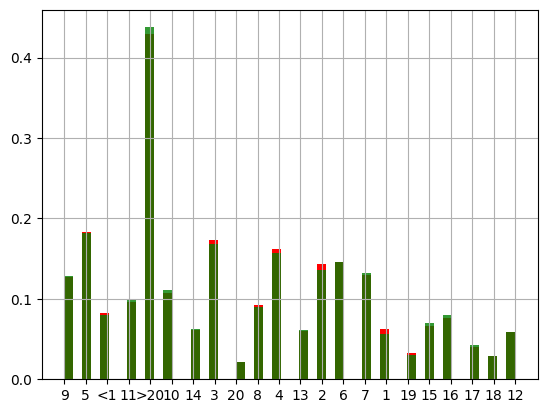

In [13]:
fig = plt.figure() 
ax = fig.add_subplot(111)

# original data 
df['experience'].hist(bins = 50 , ax = ax , density = True , color = 'red') 

#updated data 
new_df['experience'].hist(bins = 50 , ax = ax , color = 'green' , density = True , alpha = 0.8) 

In [14]:
temp = pd.concat([
    #percentage of observations per category original data 
    df['enrolled_university'].value_counts() / len(df) , 
    
    # percentage of observations per category  , cca data 
    new_df['enrolled_university'].value_counts() / len(new_df)
] , axis = 1)

In [15]:
temp.columns = ['Original data' , 'cca data'] 

In [16]:
temp

,Original data,cca data
no_enrollment,0.713481,0.727948
Full time course,0.204321,0.202180
Part time course,0.067637,0.069871


In [17]:
temp = pd.concat([
    #percentage of observations per category original data 
    df['education_level'].value_counts() / len(df) , 
    
    # percentage of observations per category  , cca data 
    new_df['education_level'].value_counts() / len(new_df)
] , axis = 1)

In [18]:
temp.columns = ['Orignal Data' , 'CCA Data'] 
temp

,Orignal Data,CCA Data
Graduate,0.596054,0.611497
Masters,0.232973,0.239346
High School,0.104274,0.106541
Phd,0.025364,0.026264
Primary School,0.016909,0.016353


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv("C:\\Users\\subha\\dsjob.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [34]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [35]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [36]:
len(df[cols].dropna())/len(df)

0.9478628464067638

In [39]:
new_df=df[cols].dropna()
new_df.shape

(2018, 4)

<AxesSubplot: >

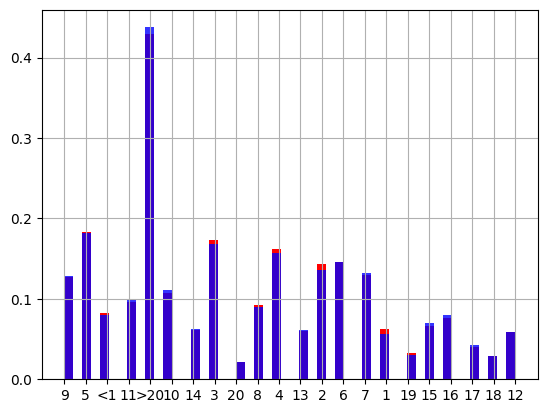

In [41]:
fig=plt.figure()
ax=fig.add_subplot(111)
df["experience"].hist(bins=50,ax=ax,density=True,color="red")
new_df["experience"].hist(bins=50,ax=ax,density=True,color="blue",alpha=0.8)

In [43]:
temp=pd.concat([
    df["education_level"].value_counts()/len(df),
    new_df["education_level"].value_counts()/len(df)
    
],axis=1)

In [ ]:
temp=pd.concat([
    df[""].value_counts()/len(df),
    new_df["education_level"].value_counts()/len(df)
    
],axis=1)